In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_15616\2871419233.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_df = pd.read_csv("train.csv")
#test_df = pd.read_csv("test_x.csv")

In [3]:
train_df.isnull().sum()

index                                         0
Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Öbek İsmi                                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64

<Axes: xlabel='Yıllık Ortalama Sipariş Verilen Ürün Adedi', ylabel='Yıllık Ortalama Sepete Atılan Ürün Adedi'>

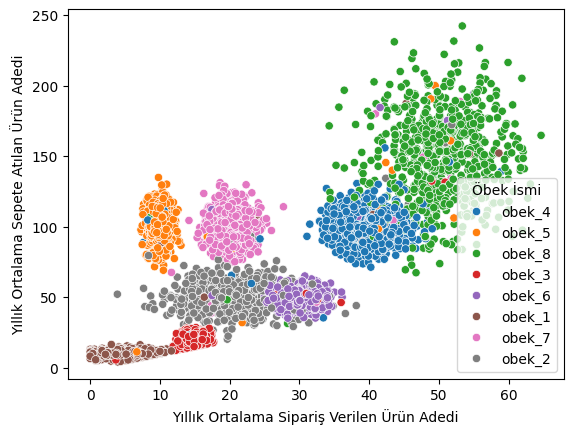

In [4]:
sns.scatterplot(x="Yıllık Ortalama Sipariş Verilen Ürün Adedi",y="Yıllık Ortalama Sepete Atılan Ürün Adedi",data=train_df, hue="Öbek İsmi")

## Drop other columns

In [5]:
x_df = train_df.drop(["Cinsiyet", "Yaş Grubu", "Medeni Durum", "İstihdam Durumu", "Yaşadığı Şehir", "En Çok İlgilendiği Ürün Grubu", "Eğitim Düzeyi", "Eğitime Devam Etme Durumu"], axis=1)

df_2 = x_df.drop(["index", "Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı"], axis=1)

df_4 = df_2[df_2["Öbek İsmi"] == "obek_2"]
df_4 = df_4.drop(["Öbek İsmi"], axis=1)
df_4

,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
67,8.680043,50.776121
70,14.399716,46.937575
77,20.764440,39.410609
82,10.664512,48.035163
96,24.568341,67.269806
...,...,...
5404,14.636095,63.137571
5406,14.141637,33.675721
5420,18.822320,49.406367
5429,27.638815,69.673309


## Isolation Forest - Anomaly Detection

In [6]:
from sklearn.ensemble import IsolationForest

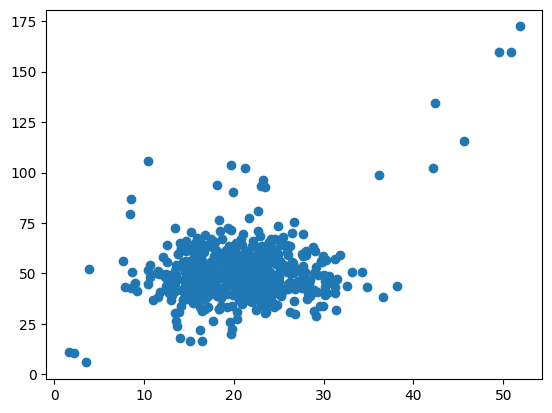

In [7]:
plt.scatter(df_4.iloc[:,0], df_4.iloc[:,1])

In [8]:
clf = IsolationForest(contamination=0.0475)
clf.fit(df_4)
predictions = clf.predict(df_4)
predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [9]:
index = np.where(predictions < 0)
index

(array([ 40,  45,  61,  62,  80, 133, 159, 173, 187, 195, 237, 267, 302,
        319, 341, 342, 359, 392, 411, 418, 423, 444, 485, 495, 538, 540],
       dtype=int64),)

In [10]:
x=df_4.values

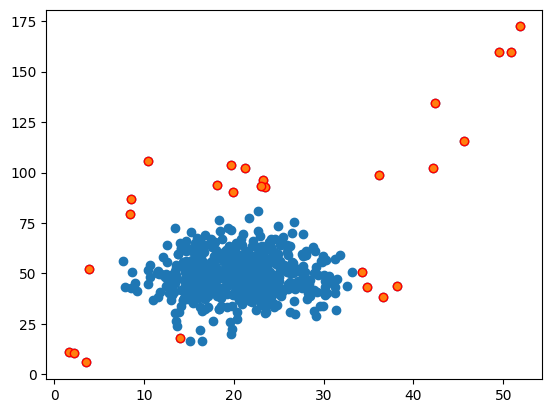

In [11]:
plt.scatter(df_4.iloc[:,0], df_4.iloc[:,1])
plt.scatter(x[index,0],x[index,1], edgecolors="r")

## Delete rows with given indexes

In [12]:
index = np.where(predictions < 0)

df_4["index"] = range(df_4.shape[0])
df_4.shape[0]
df_4

for i, row in df_4.iterrows():
    if (row["index"] == index).any():
        print(row["index"])
        df_4.drop(i, inplace=True)
df_4

40.0
45.0
61.0
62.0
80.0
133.0
159.0
173.0
187.0
195.0
237.0
267.0
302.0
319.0
341.0
342.0
359.0
392.0
411.0
418.0
423.0
444.0
485.0
495.0
538.0
540.0


,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,index
67,8.680043,50.776121,0
70,14.399716,46.937575,1
77,20.764440,39.410609,2
82,10.664512,48.035163,3
96,24.568341,67.269806,4
...,...,...,...
5404,14.636095,63.137571,542
5406,14.141637,33.675721,543
5420,18.822320,49.406367,544
5429,27.638815,69.673309,545


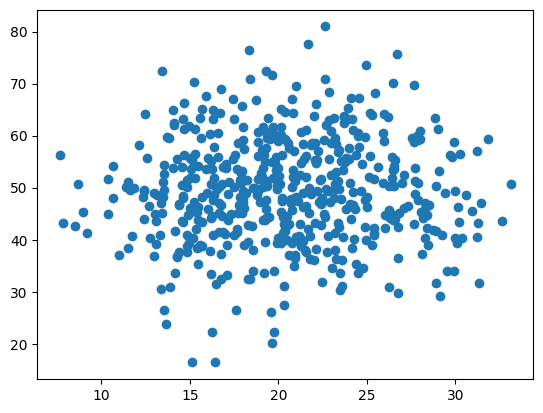

In [13]:
plt.scatter(df_4.iloc[:,0], df_4.iloc[:,1])

In [14]:
# Initialize model for anomaly detection
clf = IsolationForest(random_state=42, contamination=0.05)  # Adjust contamination as needed

# Store anomalies to be removed
anomalies_indices = []

# Iterate over all clusters (1 to 8)
for i in range(1, 9):
    # Filter data for the current cluster
    cluster_data = train_df[train_df["Öbek İsmi"] == f"obek_{i}"]

    # Drop unnecessary column before model fitting
    # Select only the relevant columns
    cluster_data = cluster_data[["Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]]

    # Fit the model and predict anomalies
    clf.fit(cluster_data)
    predictions = clf.predict(cluster_data)

    # Identify anomalies
    anomaly_indices = cluster_data.index[predictions == -1]
    anomalies_indices.extend(anomaly_indices)

# Remove anomalies from the original dataset
train_df_cleaned = train_df.drop(index=anomalies_indices)

<Axes: xlabel='Yıllık Ortalama Sipariş Verilen Ürün Adedi', ylabel='Yıllık Ortalama Sepete Atılan Ürün Adedi'>

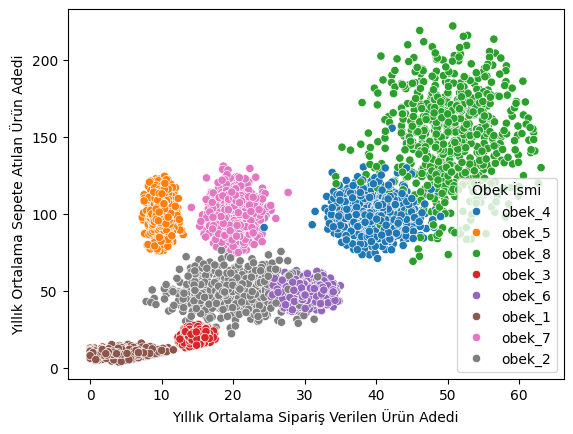

In [15]:
sns.scatterplot(x="Yıllık Ortalama Sipariş Verilen Ürün Adedi",y="Yıllık Ortalama Sepete Atılan Ürün Adedi",data=train_df_cleaned, hue="Öbek İsmi")

In [16]:
# Save the cleaned dataset
train_df_cleaned.to_csv("train_cleaned.csv", index=False)

# Optional: Visualize results
print(f"Total anomalies removed: {len(anomalies_indices)}")

Total anomalies removed: 276
